In [1]:
import pandas as pd
import networkx as nx
import community as community_louvain
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./output.csv')
G = nx.from_pandas_edgelist(df, source='DOI', target='Reference', create_using=nx.DiGraph())

In [3]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f'Number of nodes: {num_nodes}')
print(f'Number of edges: {num_edges}')

Number of nodes: 49607
Number of edges: 87907


In [4]:
density = nx.density(G)
print(f'Network density: {density}')

Network density: 3.572286534049335e-05


In [5]:
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)

# Convert the dictionary to a pandas DataFrame
eigenvector_centrality_df = pd.DataFrame(list(eigenvector_centrality.items()), columns=['Node', 'Eigenvector Centrality'])

eigenvector_centrality_df.to_csv('eigenvector_centrality.csv', index=False)

eigenvector_centrality_df_from_csv = pd.read_csv('eigenvector_centrality.csv')

print(eigenvector_centrality_df_from_csv.head(10))

                                                Node  Eigenvector Centrality
0                                  10.1136/bmj.b2680            2.609560e-18
1                                            7855331            7.642112e-14
2                               10.1055/s-2003-41136            6.088718e-15
3                               10.1055/s-2002-33047            2.609560e-18
4                   10.1111/j.1365-2990.2006.00821.x            7.828681e-18
5                   10.1111/j.1365-2990.2004.00577.x            2.348604e-17
6                              10.1212/wnl.54.5.1033            3.169364e-12
7  10.1002/(sici)1097-4598(199606)19:6<787::aid-m...            2.440813e-11
8                                                2-i            8.984213e-11
9  10.1002/(sici)1097-4598(199612)19:12<1605::aid...            1.986645e-11


In [6]:
closeness_centrality = nx.closeness_centrality(G)

# Convert the dictionary to a pandas DataFrame
closeness_centrality_df = pd.DataFrame(list(closeness_centrality.items()), columns=['Node', 'Closeness Centrality'])

closeness_centrality_df.to_csv('closeness_centrality.csv', index=False)

closeness_centrality_df_from_csv = pd.read_csv('closeness_centrality.csv')

print(closeness_centrality_df_from_csv.head(10))

                                                Node  Closeness Centrality
0                                  10.1136/bmj.b2680              0.000110
1                                            7855331              0.000527
2                               10.1055/s-2003-41136              0.000315
3                               10.1055/s-2002-33047              0.000089
4                   10.1111/j.1365-2990.2006.00821.x              0.000110
5                   10.1111/j.1365-2990.2004.00577.x              0.000157
6                              10.1212/wnl.54.5.1033              0.001397
7  10.1002/(sici)1097-4598(199606)19:6<787::aid-m...              0.001262
8                                                2-i              0.002594
9  10.1002/(sici)1097-4598(199612)19:12<1605::aid...              0.001372


                                                Node  In-Degree Centrality  \
0                                  10.1136/bmj.b2680              0.000060   
1                                            7855331              0.000060   
2                               10.1055/s-2003-41136              0.000101   
3                               10.1055/s-2002-33047              0.000020   
4                   10.1111/j.1365-2990.2006.00821.x              0.000060   
5                   10.1111/j.1365-2990.2004.00577.x              0.000081   
6                              10.1212/wnl.54.5.1033              0.000403   
7  10.1002/(sici)1097-4598(199606)19:6<787::aid-m...              0.000040   
8                                                2-i              0.000847   
9  10.1002/(sici)1097-4598(199612)19:12<1605::aid...              0.000121   

   In-Degree Count  
0                3  
1                3  
2                5  
3                1  
4                3  
5              

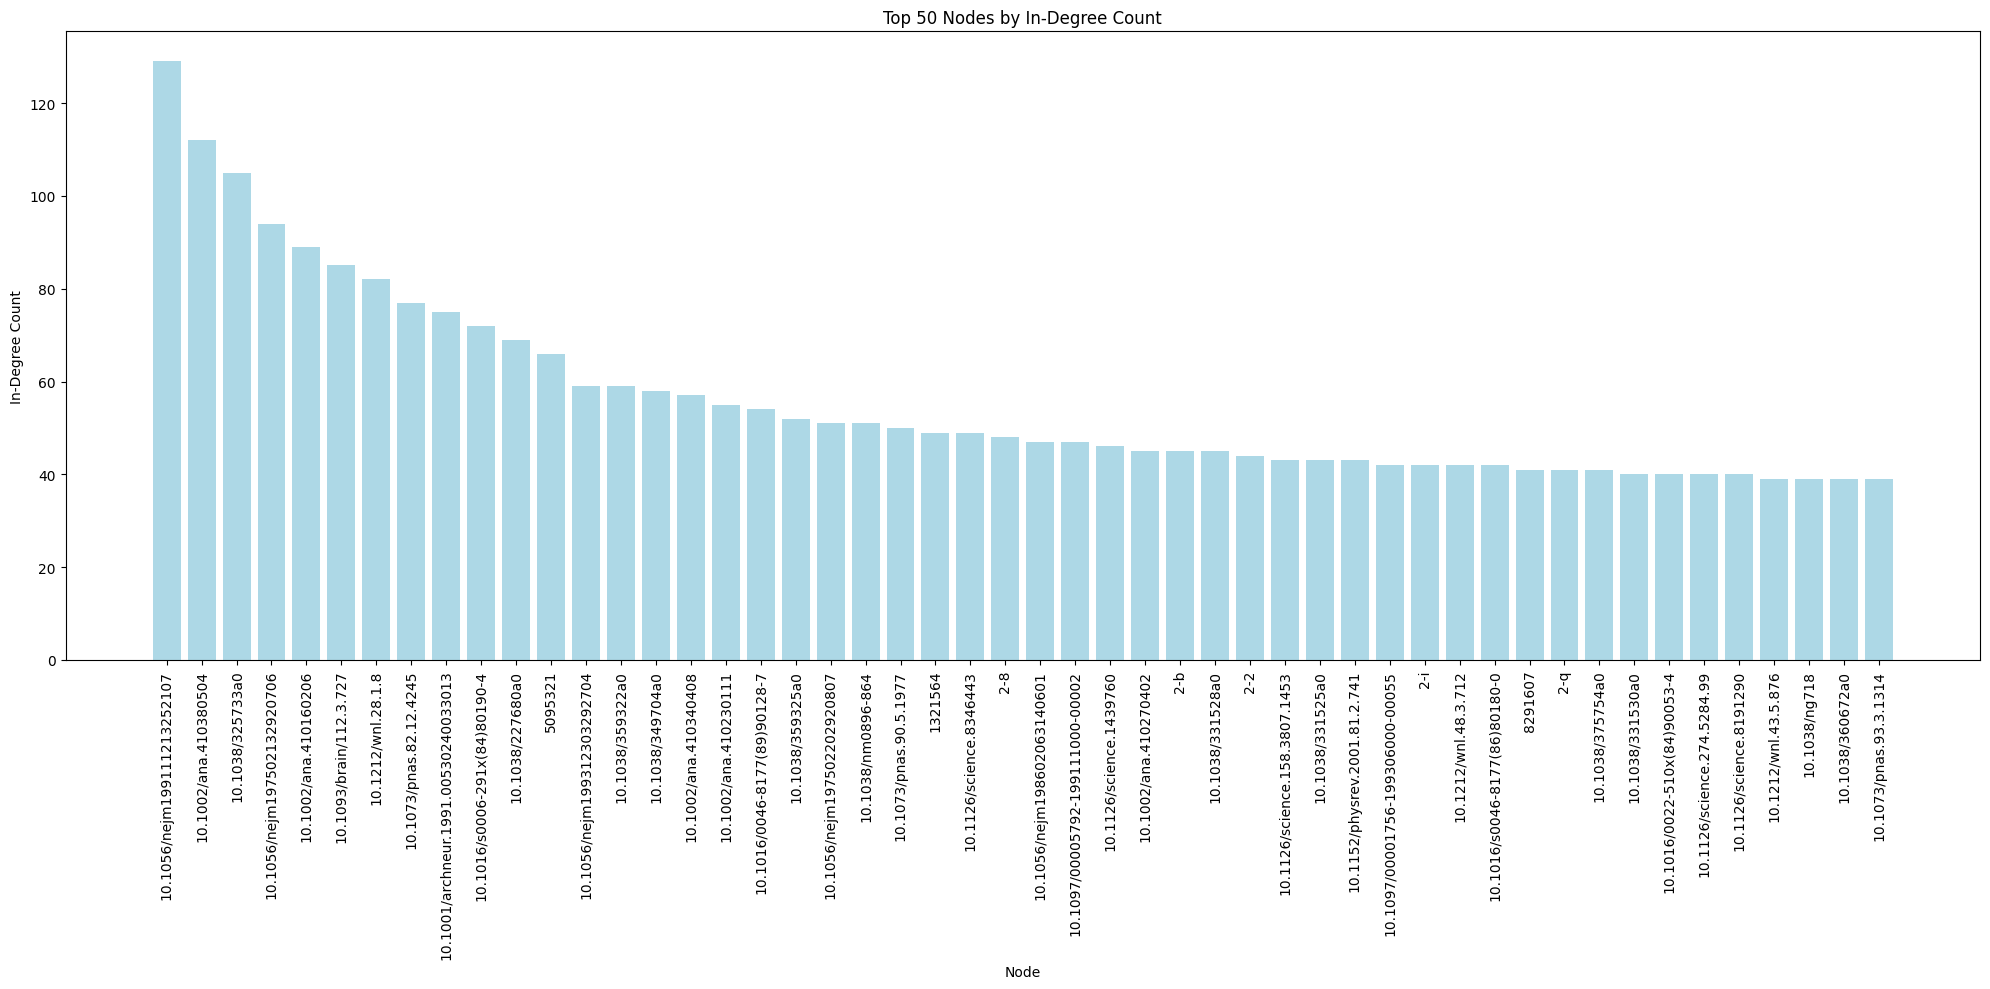

In [7]:
in_degree_centrality = nx.in_degree_centrality(G)

# Get raw in-degree counts
in_degrees = dict(G.in_degree())

# Convert the in-degree centrality dictionary to a pandas DataFrame
in_degree_centrality_df = pd.DataFrame(list(in_degree_centrality.items()), columns=['Node', 'In-Degree Centrality'])

in_degree_centrality_df['In-Degree Count'] = in_degree_centrality_df['Node'].map(in_degrees)

in_degree_centrality_df = in_degree_centrality_df.dropna(subset=['Node'])

in_degree_centrality_df.to_csv('in_degree_centrality.csv', index=False)

in_degree_centrality_df_from_csv = pd.read_csv('in_degree_centrality.csv')

# Print the first 10 rows of the DataFrame read from the CSV
print(in_degree_centrality_df_from_csv.head(10))

top_50_in_degrees = in_degree_centrality_df.sort_values(by='In-Degree Count', ascending=False).head(50)

plt.figure(figsize=(20, 10))
plt.bar(top_50_in_degrees['Node'].astype(str), top_50_in_degrees['In-Degree Count'], color='lightblue')

plt.title('Top 50 Nodes by In-Degree Count')
plt.xlabel('Node')
plt.ylabel('In-Degree Count')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

                                                Node  Out-Degree Centrality  \
0                                  10.1136/bmj.b2680               0.006189   
1                                            7855331               0.000020   
2                               10.1055/s-2003-41136               0.000464   
3                               10.1055/s-2002-33047               0.000746   
4                   10.1111/j.1365-2990.2006.00821.x               0.000423   
5                   10.1111/j.1365-2990.2004.00577.x               0.000000   
6                              10.1212/wnl.54.5.1033               0.001129   
7  10.1002/(sici)1097-4598(199606)19:6<787::aid-m...               0.000000   
8                                                2-i               0.000000   
9  10.1002/(sici)1097-4598(199612)19:12<1605::aid...               0.000000   

   Out-Degree Count  
0               307  
1                 1  
2                23  
3                37  
4                21 

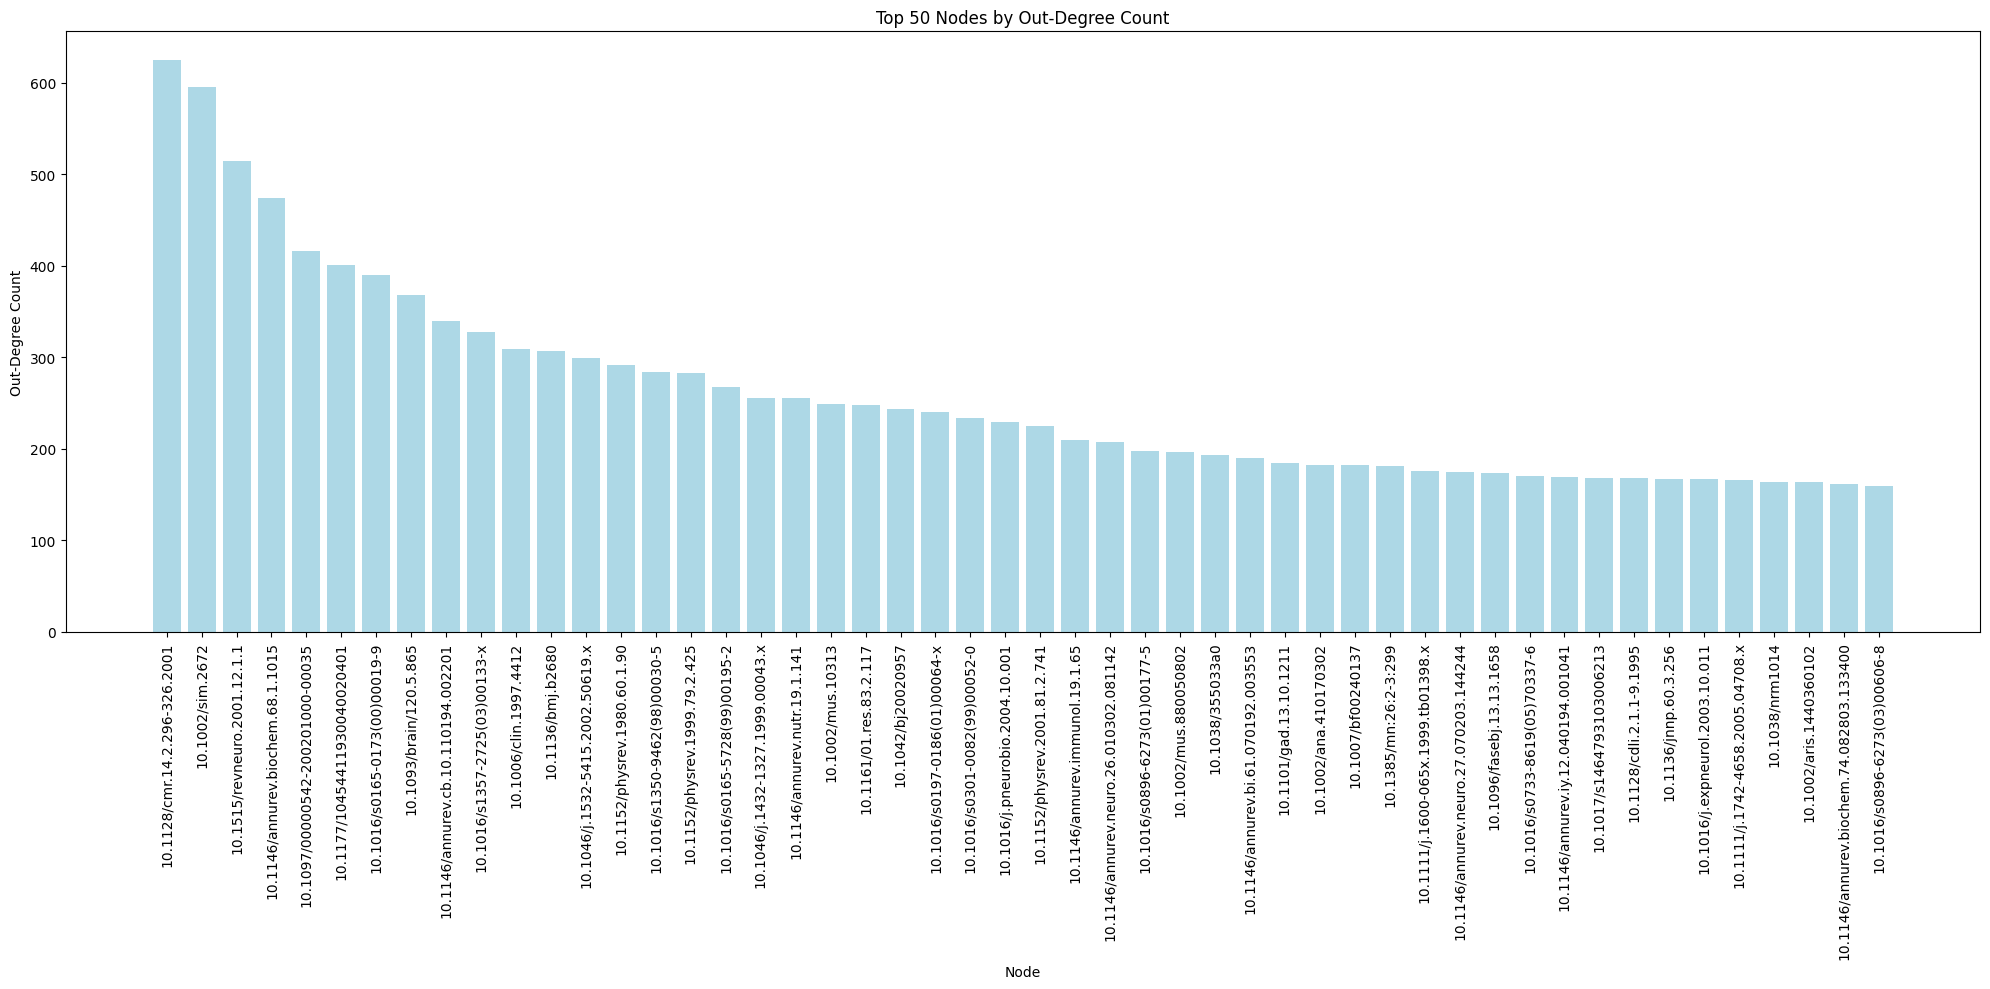

In [8]:
out_degree_centrality = nx.out_degree_centrality(G)

# Get raw out-degree counts
out_degrees = dict(G.out_degree())

# Convert the dictionary to a pandas DataFrame
out_degree_centrality_df = pd.DataFrame(list(out_degree_centrality.items()), columns=['Node', 'Out-Degree Centrality'])

# Add the raw out-degree counts to the DataFrame
out_degree_centrality_df['Out-Degree Count'] = out_degree_centrality_df['Node'].map(out_degrees)

out_degree_centrality_df.to_csv('out_degree_centrality.csv', index=False)

out_degree_centrality_df_from_csv = pd.read_csv('out_degree_centrality.csv')

print(out_degree_centrality_df_from_csv.head(10))

top_50_out_degrees = out_degree_centrality_df.sort_values(by='Out-Degree Count', ascending=False).head(50)

plt.figure(figsize=(20, 10))
plt.bar(top_50_out_degrees['Node'].astype(str), top_50_out_degrees['Out-Degree Count'], color='lightblue')

# Add titles and labels
plt.title('Top 50 Nodes by Out-Degree Count')
plt.xlabel('Node')
plt.ylabel('Out-Degree Count')
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

Top 100 most referenced DOIs/References:
nan: 383 references
10.1056/nejm199111213252107: 129 references
10.1002/ana.410380504: 112 references
10.1038/325733a0: 105 references
10.1056/nejm197502132920706: 94 references
10.1002/ana.410160206: 89 references
10.1093/brain/112.3.727: 85 references
10.1212/wnl.28.1.8: 82 references
10.1073/pnas.82.12.4245: 77 references
10.1001/archneur.1991.00530240033013: 75 references
10.1016/s0006-291x(84)80190-4: 72 references
10.1038/227680a0: 69 references
5095321: 66 references
10.1056/nejm199312303292704: 59 references
10.1038/359322a0: 59 references
10.1038/349704a0: 58 references
10.1002/ana.410340408: 57 references
10.1002/ana.410230111: 55 references
10.1016/0046-8177(89)90128-7: 54 references
10.1038/359325a0: 52 references
10.1038/nm0896-864: 51 references
10.1056/nejm197502202920807: 51 references
10.1073/pnas.90.5.1977: 50 references
1321564: 49 references
10.1126/science.8346443: 49 references
2-8: 48 references
10.1056/nejm198602063140601

ValueError: Unknown format code 'f' for object of type 'str'

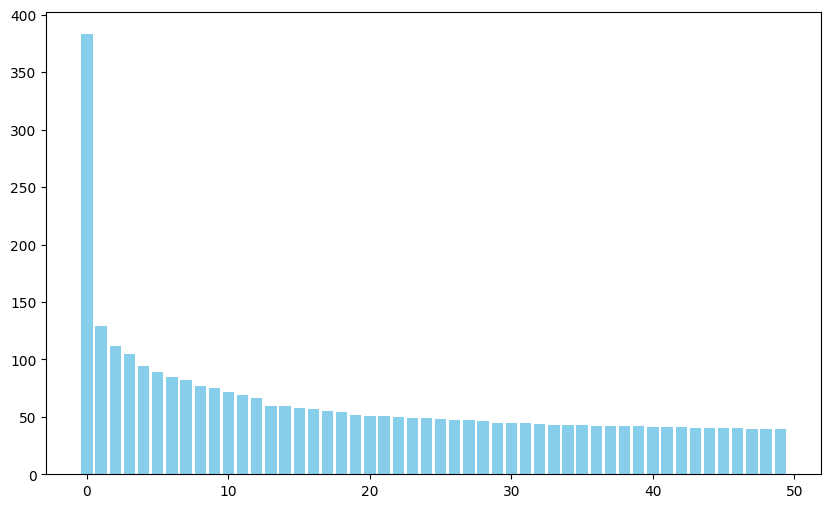

In [9]:
import math

# Assuming in_degrees is obtained from G.in_degree()
in_degrees = G.in_degree()

# Filter out any (doi, degree) pairs where doi is nan before sorting
filtered_in_degrees = [(doi, degree) for doi, degree in in_degrees if doi != 'nan']

most_referenced = sorted(filtered_in_degrees, key=lambda x: x[1], reverse=True)[:50]

print("Top 100 most referenced DOIs/References:")
for doi, degree in most_referenced:
    print(f'{doi}: {degree} references')
    
dois = [doi for doi, _ in most_referenced]
references = [degree for _, degree in most_referenced]

# Generate a range for the x-axis
x_range = range(len(most_referenced))

# Extract the references (y-values)
references = [degree for _, degree in most_referenced]

# Plot using the range
plt.figure(figsize=(10, 6))
plt.bar(x_range, references, color='skyblue')

# Set the x-tick labels to the formatted DOIs, converting floats to strings
plt.xticks(x_range, [f'{doi:.2f}' for doi, _ in most_referenced], rotation=45, ha="right")

# Add titles and labels
plt.title('Top 50 Most Referenced DOIs/References')
plt.xlabel('DOI/Reference')
plt.ylabel('Number of References')
plt.tight_layout()
plt.show()

In [ ]:
pagerank = nx.pagerank(G)

# Get the top 5 nodes by PageRank
top_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nodes by PageRank:")
for node, score in top_pagerank:
    print(f'{node}: {score}')

Top 5 nodes by PageRank:
nan: 0.006565382628955304
10.1002/ana.410380504: 0.00011968918918475518
10.1056/nejm199111213252107: 0.00011349585604739322
10.1212/wnl.28.1.8: 9.859600127326305e-05
10.1093/brain/112.3.727: 8.998325363612584e-05


In [ ]:
assortativity = nx.degree_assortativity_coefficient(G)
print(f'Assortativity coefficient: {assortativity}')

Assortativity coefficient: -0.10466565188988489


In [ ]:
clustering_coefficient = nx.average_clustering(G.to_undirected())
print(f'Average clustering coefficient: {clustering_coefficient}')

Average clustering coefficient: 0.06971364907232595


In [ ]:
betweenness_centrality = nx.betweenness_centrality(G)

# Convert the dictionary to a pandas DataFrame
betweenness_centrality_df = pd.DataFrame(list(betweenness_centrality.items()), columns=['Node', 'Betweenness Centrality'])

betweenness_centrality_df.to_csv('betweenness_centrality.csv', index=False)

betweenness_centrality_df_from_csv = pd.read_csv('betweenness_centrality.csv')

print(betweenness_centrality_df_from_csv.head(10))

KeyboardInterrupt: 